In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv('spambase.csv', header = 0)
print(len(df.axes[0]))
print(len(df.axes[1]))
df.head()
print(df.columns)

4600
58
Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')


In [3]:
# remove duplicates and verify
df = df.drop_duplicates()
df[df.duplicated()]

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1


In [4]:
# check for null values
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [7]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(4209, 58)
(4209, 2)


Text(0, 0.5, 'Second Principal component')

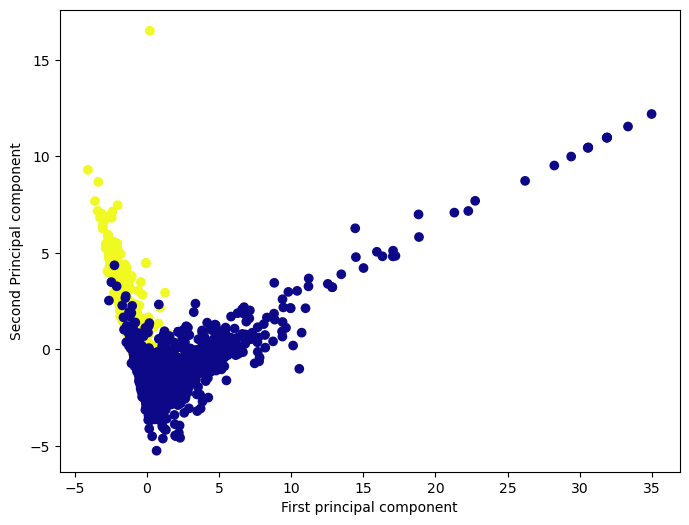

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['1'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal component')

In [9]:
pca.components_

array([[-0.05219507, -0.02528291, -0.05858454, -0.00825388, -0.04905363,
        -0.0578451 , -0.0656958 , -0.04732171, -0.06172782, -0.03208936,
        -0.06926324, -0.02309749, -0.0462856 , -0.02204646, -0.04281141,
        -0.0602736 , -0.06425148, -0.03005828, -0.1026155 , -0.0428882 ,
        -0.10148889, -0.01895902, -0.07353372, -0.05408178,  0.21122728,
         0.2059941 ,  0.08857403,  0.26515292,  0.20619927,  0.29225574,
         0.29426493,  0.33639382,  0.01318745,  0.33519719,  0.25198502,
         0.30149028,  0.06406063, -0.00040405,  0.04808648,  0.30339099,
         0.01912883,  0.03265496,  0.08063658,  0.01864531,  0.0201449 ,
         0.00577524,  0.00525006,  0.00928535,  0.0012782 ,  0.13063845,
         0.02601062, -0.05885977, -0.07358069, -0.00516757, -0.02551479,
        -0.04370533, -0.05888981, -0.16243263],
       [ 0.11985183,  0.09666809,  0.12554365,  0.01311015,  0.11373273,
         0.13338874,  0.15378532,  0.12521243,  0.1942247 ,  0.13910466,
   

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [11]:
# split dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [12]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3367
842
3367
842


In [13]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')

In [15]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [17]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[471  24]
 [ 48 299]]
0.8925373134328358


In [18]:
print(accuracy_score(y_test, y_pred))

0.9144893111638955


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       495
           1       0.93      0.86      0.89       347

    accuracy                           0.91       842
   macro avg       0.92      0.91      0.91       842
weighted avg       0.92      0.91      0.91       842

